商品期货期权 :http://gouthamanbalaraman.com/blog/value-options-commodity-futures-black-formula-quantlib-python.html
Heston Model :http://gouthamanbalaraman.com/blog/valuing-european-option-heston-model-quantLib.html

In [35]:
import QuantLib as ql
import matplotlib.pyplot as plt
from nowquotes import download
%matplotlib inline

In [54]:
maturity_date = ql.Date(28, 12, 2016) #交割日
spot_price = 2.380  #现价
strike_price = 1.908 # 行权价
volatility = 0.2 #一年的历史波动率
dividend_rate =  0.00001 #股息率
option_type = ql.Option.Call  #Call Put

risk_free_rate = 0.03  #无风险利率
day_count = ql.Business252()  #一年的日期数 ActualActual()
calendar = ql.China() #China

calculation_date = ql.Date(12, 12, 2016)  #计算日
ql.Settings.instance().evaluationDate = calculation_date

In [55]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)  #简单偿付 AmericanPayoffAtExpiry,AssetOrNothing,CashOrNothing数字偿付
exercise = ql.EuropeanExercise(maturity_date)  #欧式行权 AmericanExercise
european_option = ql.VanillaOption(payoff, exercise) #简单期权,DividendBarrierOption其它类型

In [56]:
spot_handle = ql.QuoteHandle(  #Handle<Quote>
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle( #Handle<YieldTermStructure> 利率结构
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)  
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)  ##FlatForward 平坦远期利率曲线
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)  
    #常数Black波动率
)  ##FlatForward 平坦远期利率曲线
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts)
#常参数Black Scholes Merton过程
#   spot(float) - 标的初值
#   riskFree(float) - 无风险利率
#   dividend(float) - 红利
#   vol(float) - 波动率

In [57]:
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print "The theoretical price is ", bs_price

The theoretical price is  0.474722637873


In [58]:
print european_option.delta()

0.999999370489


In [59]:
vol = european_option.impliedVolatility(0.4757,bsm_process)
print vol

0.458808654688


In [8]:
def binomial_price(bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
    european_option.setPricingEngine(binomial_engine)
    return european_option.NPV()

steps = range(2, 100, 1)
prices = [binomial_price(bsm_process, step) for step in steps]

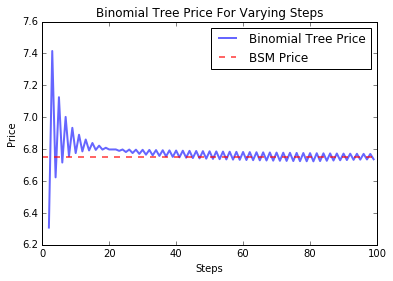

In [9]:
plt.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
plt.plot([0,100],[bs_price, bs_price], "r--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps")
plt.ylabel("Price")
plt.title("Binomial Tree Price For Varying Steps")
plt.legend()

In [30]:
# option data
maturity_date = ql.Date(28, 12, 2016)
spot_price = 2.413
strike_price = 1.908
volatility = 0.00001 # the historical vols for a year
dividend_rate =  0.0
option_type = ql.Option.Call

risk_free_rate = 0.0
day_count = ql.Actual365Fixed()
calendar = ql.China()

calculation_date = ql.Date(9, 12, 2016)
ql.Settings.instance().evaluationDate = calculation_date


In [36]:

# construct the European Option
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)


spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts)

european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print "The theoretical price is ", bs_price

The theoretical price is  0.505
